# Pymaceuticals Inc.
---

## Analysis

Summary: 

The analysis began by cleaning and combining mouse data and study results, resulting in a dataset of 248 mice. Visualizations like pie charts and bar plots were used to show the distribution of male and female mice and the number of observed mouse time points for each drug regimen, highlighting Capomulin and Ramicane as having the most data points. Summary statistics were computed, with Capomulin and Ramicane showing the smallest standard error of the mean (SEM) for tumor volume, indicating more precise estimates. Box plots and line plots were used to illustrate tumor volume distribution and progression over time for mice under different treatments, particularly highlighting Capomulin and Ramicane's effectiveness. A scatter plot revealed a strong positive correlation between mouse weight and tumor volume under the Capomulin regimen.

Conclusion: 

The analysis provides valuable insights into the effectiveness of different drug regimens, with Capomulin and Ramicane standing out for their lower SEM and smaller tumor volumes. The positive response observed in the line plot and the correlation between weight and tumor volume suggest avenues for further investigation, emphasizing the need for additional studies to establish causal relationships.
 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
unique_mouse_ids = combined_data['Mouse ID'].nunique()

unique_mouse_ids

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
unique_mouse_timepoints = combined_data.groupby(['Mouse ID', 'Timepoint']).ngroups

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]

duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_data = combined_data.loc[combined_data['Mouse ID'] =='g989']

all_duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data['Mouse ID'] != 'g989']

In [11]:
# Checking the number of mice in the clean DataFrame.
cleaned_data['Mouse ID'].nunique()

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_statistics.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Assemble the resulting series into a single summary DataFrame.
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'] \
    .agg(['mean', 'median', 'var', 'std', 'sem']) \
    .rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Dev.', 'sem': 'Std. Err.'})

summary_stats

,Mean,Median,Variance,Standard Dev.,Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

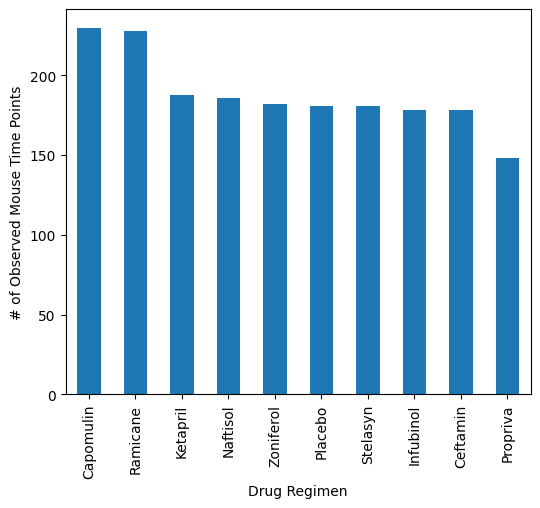

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Cleaned DataFrame
cleaned_data = combined_data[combined_data['Mouse ID'] != 'g989']

# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_count = cleaned_data['Drug Regimen'].value_counts()

drug_regimen_count.plot.bar(figsize=(6, 5))

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Time Points')

plt.show()

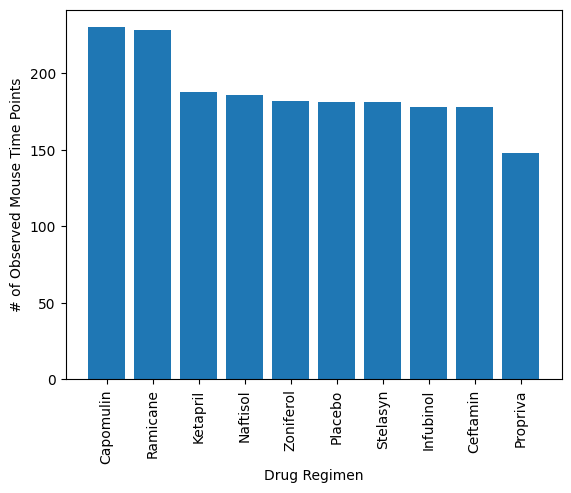

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis = cleaned_data['Drug Regimen'].value_counts()

sorted_values = y_axis.sort_values(ascending=False)
x_axis = sorted_values.index.tolist()
y_axis = sorted_values.values


plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Time Points')
plt.xticks(rotation=90)

plt.show()

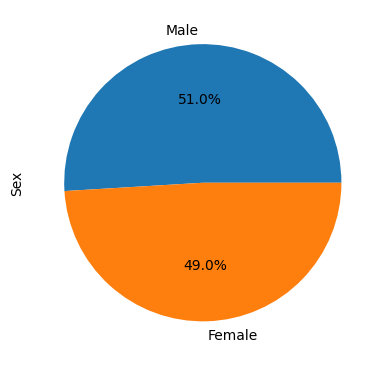

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Calculate the count of each gender
mice_gender = cleaned_data['Sex'].value_counts()
mice_gender.plot.pie(figsize=(4.5, 4.5), autopct='%1.1f%%').set_ylabel('Sex')

plt.show()

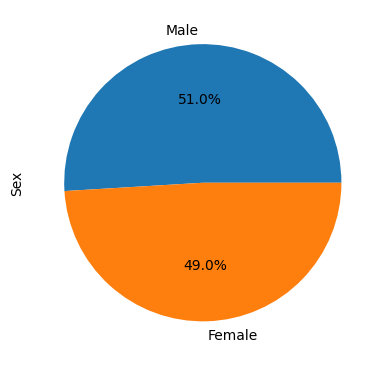

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mice_gender.index.tolist()
sizes = mice_gender.values.tolist()

plt.figure(figsize=(4.5, 4.5))
plt.ylabel('Sex')
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Cleaned DataFrame
cleaned_data = combined_data[combined_data['Mouse ID'] != 'g989']

# Specify the treatments to include
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Fiter to four of the treatment regimens
cleaned_data = cleaned_data[cleaned_data['Drug Regimen'].isin(treatments)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(max_timepoints, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volumes 

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add subset
    tumor_vol_data.append(tumor_volumes)

    quartiles = tumor_volumes.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr_val = upperq - lowerq 

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr_val)
    upper_bound = upperq + (1.5 * iqr_val)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    print(f"{treatment}'s potential outliers are: {outliers}")

Capomulin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers are: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


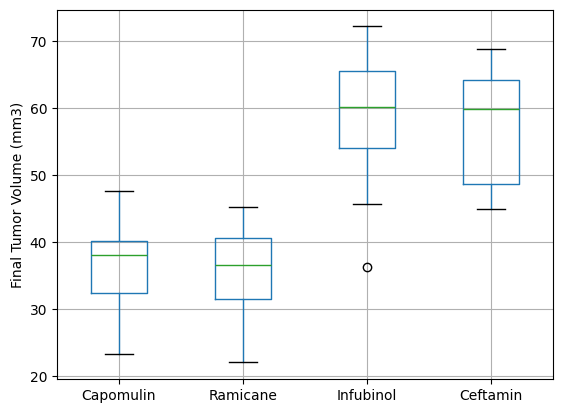

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_df = pd.DataFrame({treatment: data for treatment, data in zip(treatments, tumor_vol_data)})

plt.figure()
tumor_vol_df.boxplot()
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

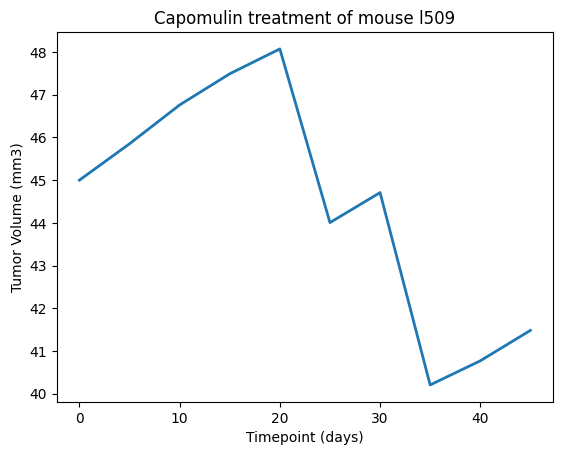

In [26]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_capomulin = cleaned_data[cleaned_data['Mouse ID'] == 'l509']

x_axis = mouse_capomulin['Timepoint']
y_axis = mouse_capomulin['Tumor Volume (mm3)']

plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.plot(x_axis, y_axis, linewidth=2, markersize=10)

plt.show()

In [27]:
# Filter data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

capomulin_data.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


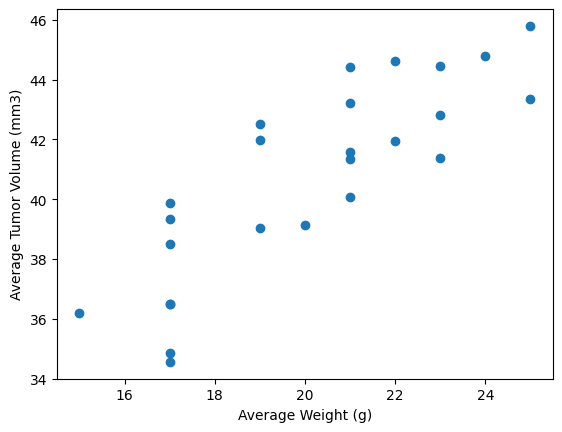

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse under Capomulin regimen
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Extract unique mouse weight and corresponding average tumor volume
avg_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean().reset_index()


avg_data = pd.merge(avg_tumor_volume, avg_weight, on='Mouse ID', suffixes=('_tumor', '_weight'))

plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.841936342469472


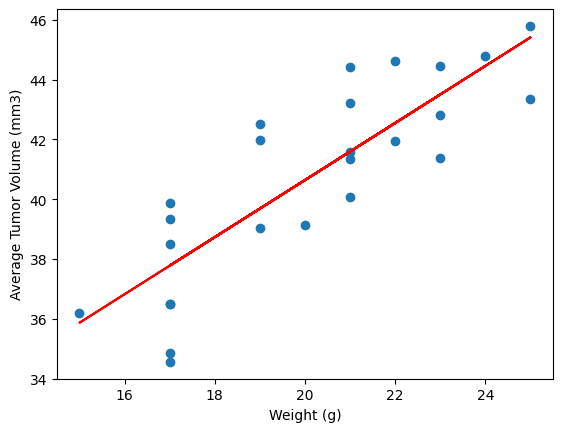

In [30]:
# Merge average tumor volume and average weight data
avg_data = pd.merge(avg_tumor_volume, avg_weight, on='Mouse ID', suffixes=('_tumor', '_weight'))

# Calculate correlation coefficient
corr_coefficient, _ = stats.pearsonr(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])
print("The correlation between mouse weight and the average tumor volume is", corr_coefficient)

# Calculate linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])

# Generate scatter plot with linear regression line
plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add linear regression line to the plot
plt.plot(avg_data['Weight (g)'], slope * avg_data['Weight (g)'] + intercept, color='red')

plt.show()